### Import useful libraries

In [1]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

## (i) Probability distributions

Use *scipy.stats* module to work on different probability distributions. Use documentation [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

#### 1. Bernoulli - an example of discrete distribution

In [2]:
dist_bernoulli = st.bernoulli # create an object for Bernoulli distribution
p = 0.3 # specify the shape parameter of a Bernoulli distribution
x = dist_bernoulli.rvs(p, size=1000) # generate 1000 random samples from the Bernoulli distribution

# evluate the probability mass function (pmf) at 0 and 1
xs = np.array([0, 1]) # posible values
pmf_bernoulli = dist_bernoulli.pmf(xs, p) # pmf with parameter p at xs

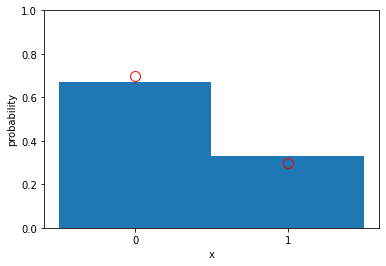

In [3]:
plt.figure()
# plot histogram of the relative frequency of 0's and 1's
plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+.5), density=True) 

# plot pmf with red circles
plt.plot(xs, pmf_bernoulli, 'ro', markersize=10, markerfacecolor='None')

plt.xticks(xs)
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

#### 2. Gaussian - an example of continuous distribution

In [4]:
dist_norm = st.norm # create an object for Gaussian distribution
mu, sigma = 3, 2 # specify the mean and standard deviation of a Gaussian distribution
x = dist_norm.rvs(loc=mu, scale=sigma, size=5000) # generate 5000 random samples from the Gausiian distribution

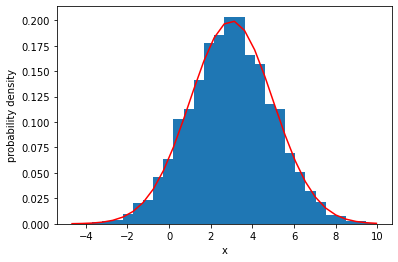

In [5]:
plt.figure()
# plot histogram
_ , xs, _ = plt.hist(x, bins=30, density=True) # return edges of bins in xs

# plot the probability density function (pdf)
pdf_norm = dist_norm.pdf(xs, loc=mu, scale=sigma)
plt.plot(xs, pdf_norm, 'r')

plt.xlabel('x')
plt.ylabel('probability density')
plt.show()

## (ii) Time series of noise

What is [Colored noise](https://en.wikipedia.org/wiki/Colors_of_noise)?

Specify properties of the time series

In [6]:
fs = 1000 # 1000 Hz sampling frequency of time series
N = 10000 # length of the time series (10 sec)
t = np.arange(N) / fs * 1000 # time points in ms

#### White noise

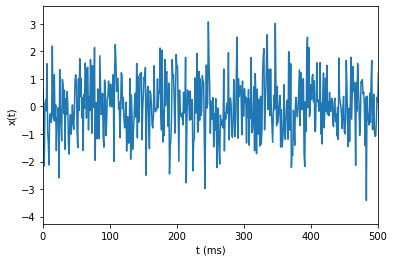

In [7]:
white_noise = dist_norm.rvs(size=N) # draw from standard Gaussian distribution

plt.figure()
plt.plot(t, white_noise)
plt.xlim([0, 500]) # show the first 500 ms
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Brownian noise (random walk)

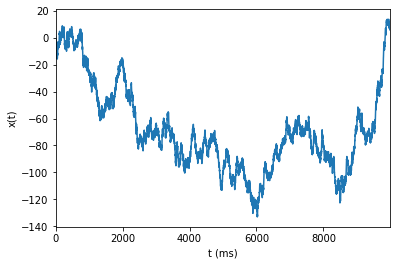

In [8]:
brownian_noise = np.cumsum(white_noise) # summing up white noise

plt.figure()
plt.plot(t, brownian_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Pink noise

In [9]:
# install the package
%pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


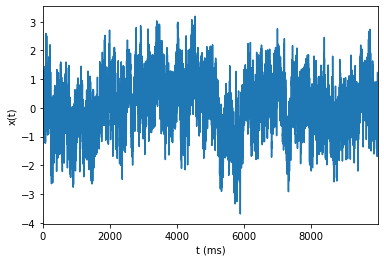

In [10]:
import colorednoise as cn
beta = 1 # set the exponent of 1/f^beta power spectrum (0<beta<2)
pink_noise = cn.powerlaw_psd_gaussian(beta, N)

plt.figure()
plt.plot(t, pink_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

## (iii) Power spectral density (PSD)

Use *scipy.signal.periodogram* and *scipy.signal.welch* to estimate PSD. Use documentation [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).

White noise has constant power spectrum. Brownian noise has $1/f^2$ PSD. Pink noise has $1/f^\beta$ PSD, $0<\beta<2$.

#### Using pink noise for example

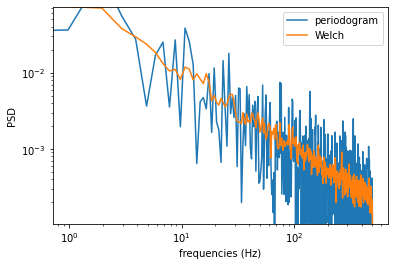

In [11]:
nperseg = 1024 # set length of each segment to 1024 (1024 ms with 1000 Hz sampling rate)

# Estimate PSD using periodogram (Bartlett's method)
f1, pxx1 = signal.periodogram(pink_noise, fs=fs, nfft=nperseg)

# Estimate PSD using Welch's method
f2, pxx2 = signal.welch(pink_noise, fs=fs, nperseg=nperseg)

# Plot estimated PSD
plt.figure()
plt.plot(f1, pxx1, label='periodogram')
plt.plot(f2, pxx2, label='Welch')
plt.xlabel('frequencies (Hz)')
plt.ylabel('PSD')

# display in log-log scale
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([pxx2.min(),pxx2.max()])

plt.legend()
plt.show()